In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

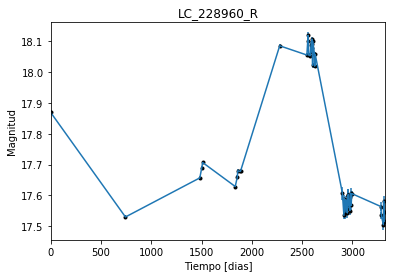

In [2]:
data = np.genfromtxt('LC_228960_R.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_228960_R')
plt.savefig("LC_228960_R.pdf")

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

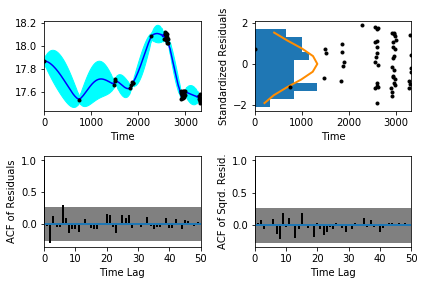

In [5]:
sample.assess_fit()

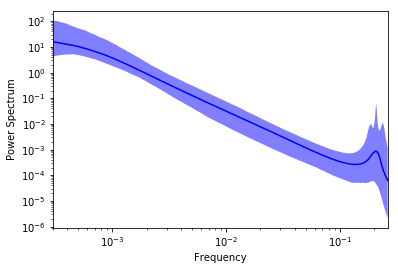

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

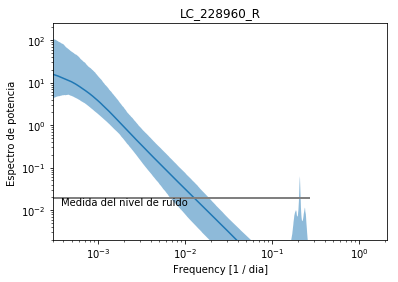

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_228960_R')
plt.savefig("Medida del nivel de ruido_R.pdf")

Text(0.5,1,'Prediccion , valor esperado LC_228960_R')

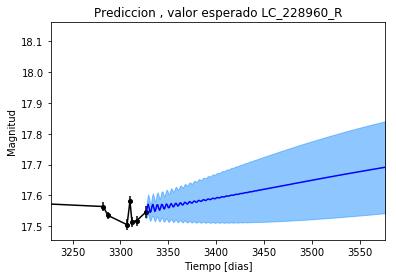

In [9]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_228960_R')

Text(0.5,1,'Prediccion, Caminos simulados_LC_228960_R')

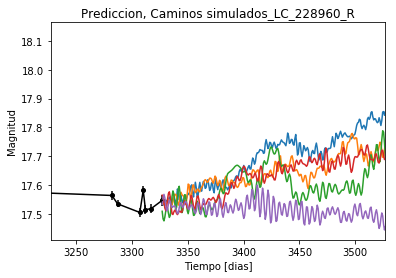

In [10]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados_LC_228960_R')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


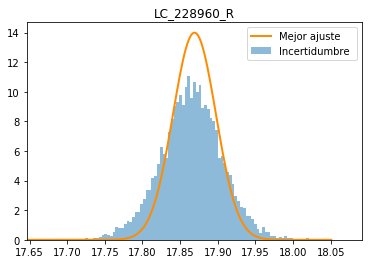

In [11]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_228960_R')
plt.savefig("Mejor_ajuste_LC_228960_R.pdf")

Text(0.5,1,'Interpolacion, camino simulado LC_228960_R')

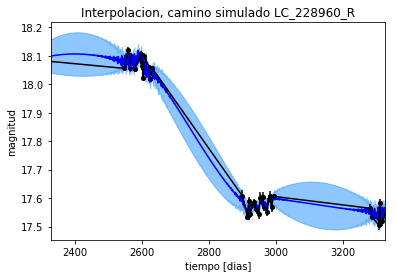

In [12]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_228960_R')

Text(0.5,1,'Interpolacion, camino simulado LC_228960_R')

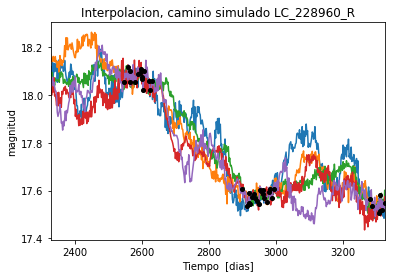

In [13]:
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_228960_R')

In [14]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [15]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 208.492536739
Median: 0.00727058020196
Standard deviation: 0.0163562797224
68% credibility interval: [ 0.00198678  0.01867794]
95% credibility interval: [ 0.00047731  0.04862532]
99% credibility interval: [ 0.00034527  0.11811557]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 208.492536739
Median: 0.00727058020196
Standard deviation: 0.0163562797224
68% credibility interval: [ 0.00198678  0.01867794]
95% credibility interval: [ 0.00047731  0.04862532]
99% credibility interval: [ 0.00034527  0.11811557]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 189.365240279
Median: 0.0363799920528
Standard deviation: 0.135702517253
68

In [16]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 141.332118964
Median: 111.242193065
Standard deviation: 2.45834260606
68% credibility interval: [ 108.85026166  113.56685435]
95% credibility interval: [ 105.76371663  115.48880746]
99% credibility interval: [ 103.43954434  116.44934618]


In [17]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 172.683273468
Median: 0.382891083124
Standard deviation: 0.885374454647
68% credibility interval: [ 0.08787107  1.70673687]
95% credibility interval: [ 0.03040331  3.16021147]
99% credibility interval: [ 0.02036601  3.46571802]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 205.611456526
Median: 1.85777204771
Standard deviation: 1.69427626152
68% credibility interval: [ 1.55719068  3.22847827]
95% credibility interval: [ 1.28048427  7.

In [18]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 1902.491344
Median: 1.84173897275e-07
Standard deviation: 9.39638202847e+45
68% credibility interval: [  1.47688055e-97   1.61502356e+02]
95% credibility interval: [  4.23567957e-127   6.45275769e+044]
99% credibility interval: [  1.31948726e-128   1.89714094e+046]


In [19]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 484.283006603
Median: 17.7359488426
Standard deviation: 0.0952184350751
68% credibility interval: [ 17.6487881   17.81146965]
95% credibility interval: [ 17.52092697  17.91165939]
99% credibility interval: [ 17.40705096  18.00350684]


In [20]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 209.600683334
Median: 0.211024831656
Standard deviation: 0.0689490995963
68% credibility interval: [ 0.19237633  0.25821985]
95% credibility interval: [ 0.17681172  0.41762396]
99% credibility interval: [ 0.16704577  0.45171776]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 209.600683334
Median: 0.211024831656
Standard deviation: 0.0689490995963
68% credibility interval: [ 0.19237633  0.25821985]
95% credibility interval: [ 0.17681172  0.41762396]
99% credibility interval: [ 0.16704577  0.45171776]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 212.041443945
Median: 0.0
Standard deviation: 0.000243172904752
68% cr

In [21]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 141.332118964
Median: 111.242193065
Standard deviation: 2.45834260606
68% credibility interval: [ 108.85026166  113.56685435]
95% credibility interval: [ 105.76371663  115.48880746]
99% credibility interval: [ 103.43954434  116.44934618]


In [22]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 200.675673212
Median: 0.0320784776059
Standard deviation: 0.0523631000318
68% credibility interval: [ 0.02041806  0.05885103]
95% credibility interval: [ 0.01417473  0.16187476]
99% credibility interval: [ 0.01131855  0.33848988]


In [23]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 685.039391046
Median: 1.05395191733
Standard deviation: 0.227566154549
68% credibility interval: [ 0.8602456   1.30001752]
95% credibility interval: [ 0.71187222  1.6066303 ]
99% credibility interval: [ 0.64383478  1.82060014]


In [24]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 604.901244753
Median: 0.00540379243206
Standard deviation: 0.035642690221
68% credibility interval: [  9.24173225e-05   3.88486985e-02]
95% credibility interval: [  8.34225911e-47   1.27557729e-01]
99% credibility interval: [  2.01714466e-48   2.21305688e-01]


In [25]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 208.492536739
Median: (-0.0456824026996-1.37482736158j)
Standard deviation: 0.445242764809
68% credibility interval: [-0.11735697-1.48979079j -0.01248331-1.30171239j]
95% credibility interval: [-0.30552192-1.89685497j -0.00299901-1.48921492j]
99% credibility interval: [-0.74214199-2.25298771j -0.00216942-1.20911665j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 208.492536739
Median: (-0.0456824026996+1.37482736158j)
Standard deviation: 0.445242764809
68% credibility interval: [-0.11735697+1.48979079j -0.01248331+1.30171239j]
95% credibility interval: [-0.30552192+1.89685497j -0.00299901+1.48921492j]
99% credibility interval: [-0.74214199+2.25298771j -0.00216942+1.20911665j]
Posterior summary for parameter ar_roots  